# Tasca Feature Engineering

**Descripció**
Aprèn a gestionar paràmetres amb Python.

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, OneHotEncoder, QuantileTransformer
from sklearn.decomposition import PCA

### Dades escollides

Agafem les dades [mlbBat10.txt](./data-sources/mlbBat10.txt). La descripció dels camps la trobem [aquí](https://www.openintro.org/data/index.php?data=mlbbat10)

Format
A data frame with 1199 observations on the following 19 variables.

|camp|descripció|
|-|-|
|**name**|Player name|
|**team**|Team abbreviation|
|**position**|Player position|
|**G** game|Number of games|
|**AB** at_bat|Number of at bats|
|**R** run|Number of runs|
|**H** hit|Number of hits|
|**2B** double|Number of doubles|
|**3B** triple|Number of triples|
|**HR** home_run|Number of home runs|
|**RBI** rbi|Number of runs batted in|
|**TB** total_base|Total bases, computed as 3HR + 23B + 1*2B + H|
|**BB** walk|Number of walks|
|**SO** strike_out|Number of strikeouts|
|**SB** stolen_base|Number of stolen bases|
|**CS** caught_stealing|Number of times caught stealing|
|**OBP** obp|On base percentage|
|**SLG** slg|Slugging percentage (total_base / at_bat)|
|**AVG** bat_avg|Batting average|

In [2]:
dtypes = {'position':'category', 'team':'category'}
mlb = pd.read_csv('../data-sources/mlbBat10.txt', sep='\t', dtype=dtypes)


## Nivell 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler.

In [3]:
mlb.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [4]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      1199 non-null   object  
 1   team      1199 non-null   category
 2   position  1199 non-null   category
 3   G         1199 non-null   int64   
 4   AB        1199 non-null   int64   
 5   R         1199 non-null   int64   
 6   H         1199 non-null   int64   
 7   2B        1199 non-null   int64   
 8   3B        1199 non-null   int64   
 9   HR        1199 non-null   int64   
 10  RBI       1199 non-null   int64   
 11  TB        1199 non-null   int64   
 12  BB        1199 non-null   int64   
 13  SO        1199 non-null   int64   
 14  SB        1199 non-null   int64   
 15  CS        1199 non-null   int64   
 16  OBP       1199 non-null   float64 
 17  SLG       1199 non-null   float64 
 18  AVG       1199 non-null   float64 
dtypes: category(2), float64(3), int64(13), object(1)

In [5]:
cols_cat = ['team','position']
cols_num = [col for col in mlb.columns if mlb[col].dtype in ['int64','float64']]


### Atributs categòrics
#### Dummy

In [6]:
for col in cols_cat:
    mlb_dummies = pd.concat([mlb, pd.get_dummies(mlb[col], prefix=col)], axis=1)
    
mlb_dummies.head()

,name,team,position,G,AB,R,H,2B,3B,HR,...,AVG,position_-,position_1B,position_2B,position_3B,position_C,position_DH,position_OF,position_P,position_SS
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,...,0.315,0,0,0,0,0,0,1,0,0
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,...,0.270,0,0,0,0,0,0,0,0,1
2,M Young,TEX,3B,157,656,99,186,36,3,21,...,0.284,0,0,0,1,0,0,0,0,0
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,...,0.275,0,0,0,0,0,0,1,0,0
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,...,0.269,0,0,1,0,0,0,0,0,0


In [7]:
mlb.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


#### Amb sklearn

In [8]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(mlb[cols_cat])

OneHotEncoder(sparse=False)

In [9]:
mlb_cat_transformed = ohe.transform(mlb[cols_cat])

In [10]:
ohe.categories_

[array(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CIN', 'CLE', 'COL', 'CWS',
        'DET', 'FLA', 'HOU', 'KC', 'LAA', 'LAD', 'MIL', 'MIN', 'NYM',
        'NYY', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEX',
        'TOR', 'WSH'], dtype=object),
 array(['-', '1B', '2B', '3B', 'C', 'DH', 'OF', 'P', 'SS'], dtype=object)]

In [11]:
ohe.inverse_transform(ohe.transform(mlb[cols_cat]))

array([['SEA', 'OF'],
       ['NYY', 'SS'],
       ['TEX', '3B'],
       ...,
       ['PHI', 'P'],
       ['OAK', 'P'],
       ['DET', 'P']], dtype=object)

### Atributs numèrics StandardScaler

In [12]:
mlb.describe().round(3)

,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
count,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000
mean,50.535,137.909,17.771,35.491,7.078,0.722,3.847,16.921,55.555,13.159,28.612,2.468,0.942,0.206,0.238,0.159
std,49.544,188.127,27.051,51.908,10.813,1.602,7.372,26.637,83.718,20.737,38.441,6.480,2.162,0.173,0.236,0.145
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,31.000,37.000,3.000,6.000,1.000,0.000,0.000,2.000,8.000,2.000,10.000,0.000,0.000,0.255,0.273,0.195
75%,84.000,225.000,26.500,56.000,11.000,1.000,4.000,25.000,82.500,20.000,44.000,1.000,1.000,0.324,0.394,0.259
max,162.000,680.000,115.000,214.000,49.000,14.000,54.000,126.000,351.000,114.000,211.000,68.000,18.000,1.000,4.000,1.000


In [13]:
sc = StandardScaler()

pd.DataFrame(sc.fit_transform(mlb[cols_num]), columns=[cols_num]).describe().round(3)

# mlb[cols_num] = sc.fit_transform(mlb[cols_num])

,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
count,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000,1199.000
mean,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.000,-0.733,-0.657,-0.684,-0.655,-0.451,-0.522,-0.636,-0.664,-0.635,-0.745,-0.381,-0.436,-1.187,-1.007,-1.103
25%,-0.859,-0.728,-0.657,-0.684,-0.655,-0.451,-0.522,-0.636,-0.664,-0.635,-0.719,-0.381,-0.436,-1.187,-1.007,-1.103
50%,-0.394,-0.537,-0.546,-0.568,-0.562,-0.451,-0.522,-0.560,-0.568,-0.538,-0.484,-0.381,-0.436,0.286,0.150,0.246
75%,0.676,0.463,0.323,0.395,0.363,0.173,0.021,0.303,0.322,0.330,0.400,-0.227,0.027,0.684,0.663,0.689
max,2.251,2.883,3.596,3.440,3.879,8.292,6.806,4.097,3.531,4.865,4.747,10.117,7.895,4.589,15.944,5.816


### Transformats a la vegada amb ColumnTransformer i Pipeline

In [14]:
mlb.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [15]:

ct = ColumnTransformer(
     transformers=[('num', StandardScaler(), cols_num),
                  ('cat', OneHotEncoder(handle_unknown='ignore'), cols_cat)])

# ct.fit_transform(mlb)

pipeline = Pipeline( steps=[('transformer',ct)], verbose=True)

In [16]:
mlb_transf = pipeline.fit_transform(mlb)

[Pipeline] ....... (step 1 of 1) Processing transformer, total=   0.0s


In [17]:
ct.named_transformers_

{'num': StandardScaler(),
 'cat': OneHotEncoder(handle_unknown='ignore'),
 'remainder': 'drop'}

In [18]:
mlb.shape, mlb_transf.shape

((1199, 19), (1199, 55))

#### Eliminem columnes 

In [19]:
# mlb.drop(columns=cols_cat, inplace=True)
# mlb.drop(columns=['name'], inplace=True)

In [20]:
mlb.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [21]:
mlb.G.std()

49.54437071061389

## Nivell 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [22]:
pca = PCA(n_components=2, svd_solver='arpack')

mlb_pca = pca.fit_transform(mlb[cols_num])


print(f'Número de components: {pca.n_components}')
print(f'Explained Variation Ratio de cada component')
for c in range(pca.n_components_):
    print(f'\tComponent {c}: Ratio: {pca.explained_variance_ratio_[c]:.5f}\tSingular Values: {pca.singular_values_[c]:.5f}')
    

Número de components: 2
Explained Variation Ratio de cada component
	Component 0: Ratio: 0.98028	Singular Values: 7748.12644
	Component 1: Ratio: 0.00716	Singular Values: 662.06843


In [23]:
dfpca = pd.DataFrame(data=mlb_pca, index=mlb.index,
                     columns=['component'+str(i+1) for i in range(pca.n_components_)],)


cols = ['team','position','G','AB','SLG','AVG']
dfpca = pd.concat([mlb[cols],dfpca], axis=1)

#### Observem la reducció de dimensions del conjunt de dades i com queda en algun dels paràmetres

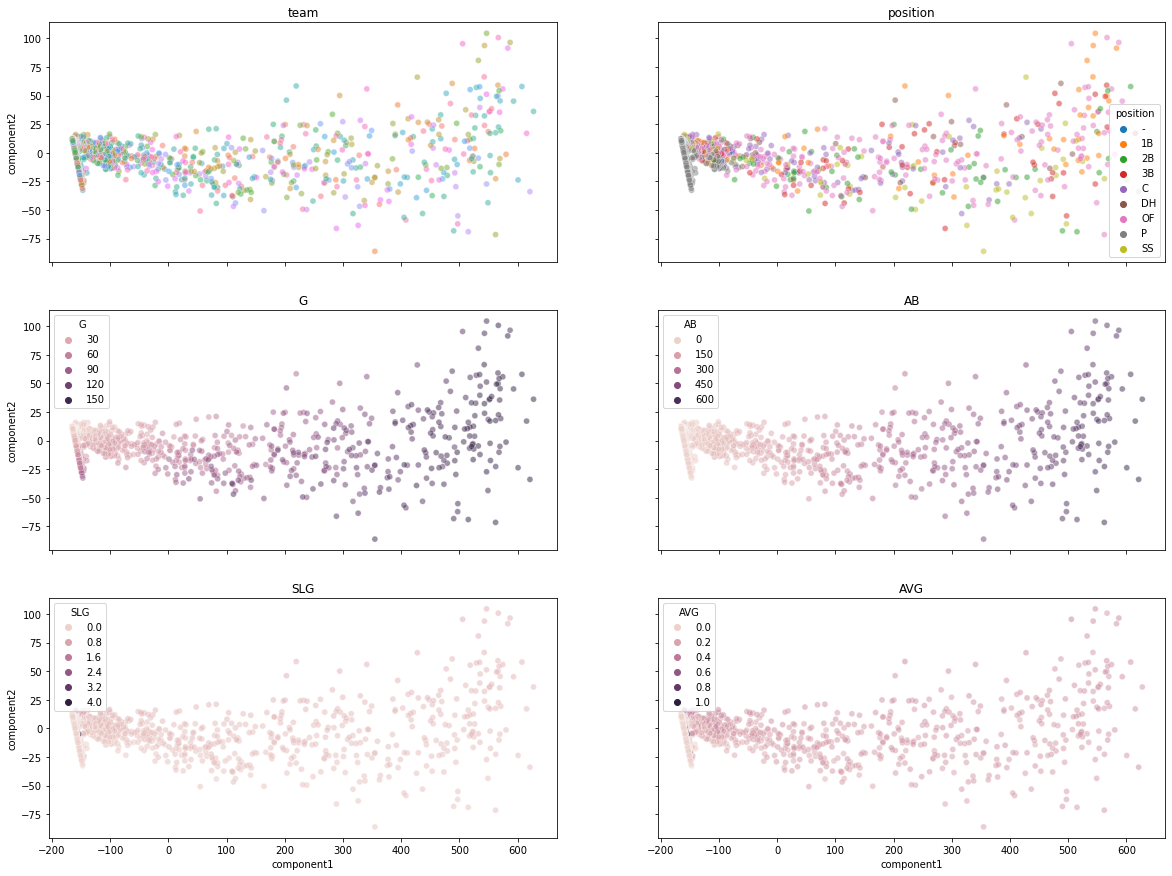

In [24]:
f, axes = plt.subplots(len(cols)//2,2, figsize=(20,15), sharex=True, sharey=True)

for i, (ax, col) in enumerate(zip(axes.flat, cols)):
    sns.scatterplot(data=dfpca, x='component1', y='component2', hue=col, alpha=0.5, ax=ax )
    if i == 0:
        ax.get_legend().remove()
#     else:
#         ax.legend()
    ax.set_title(str(col))



#### Apliquem el PCA sobre les dades normalitzades i veiem la diferència en la representació

In [25]:
pca = PCA(n_components=2, svd_solver='arpack')

mlb_pca = pca.fit_transform(mlb_transf)


print(f'Número de components: {pca.n_components}')
print(f'Explained Variation Ratio de cada component')
for c in range(pca.n_components_):
    print(f'\tComponent {c}: Ratio: {pca.explained_variance_ratio_[c]:.5f}\tSingular Values: {pca.singular_values_[c]:.5f}')
    

Número de components: 2
Explained Variation Ratio de cada component
	Component 0: Ratio: 0.65205	Singular Values: 117.64046
	Component 1: Ratio: 0.10685	Singular Values: 47.62205


In [26]:
dfpca = pd.DataFrame(data=mlb_pca, index=mlb.index,
                     columns=['component'+str(i+1) for i in range(pca.n_components_)],)


cols = ['team','position','G','AB','SLG','AVG']
dfpca = pd.concat([mlb[cols],dfpca], axis=1)

#### Observem la reducció de dimensions del conjunt de dades i com queda en algun dels paràmetres

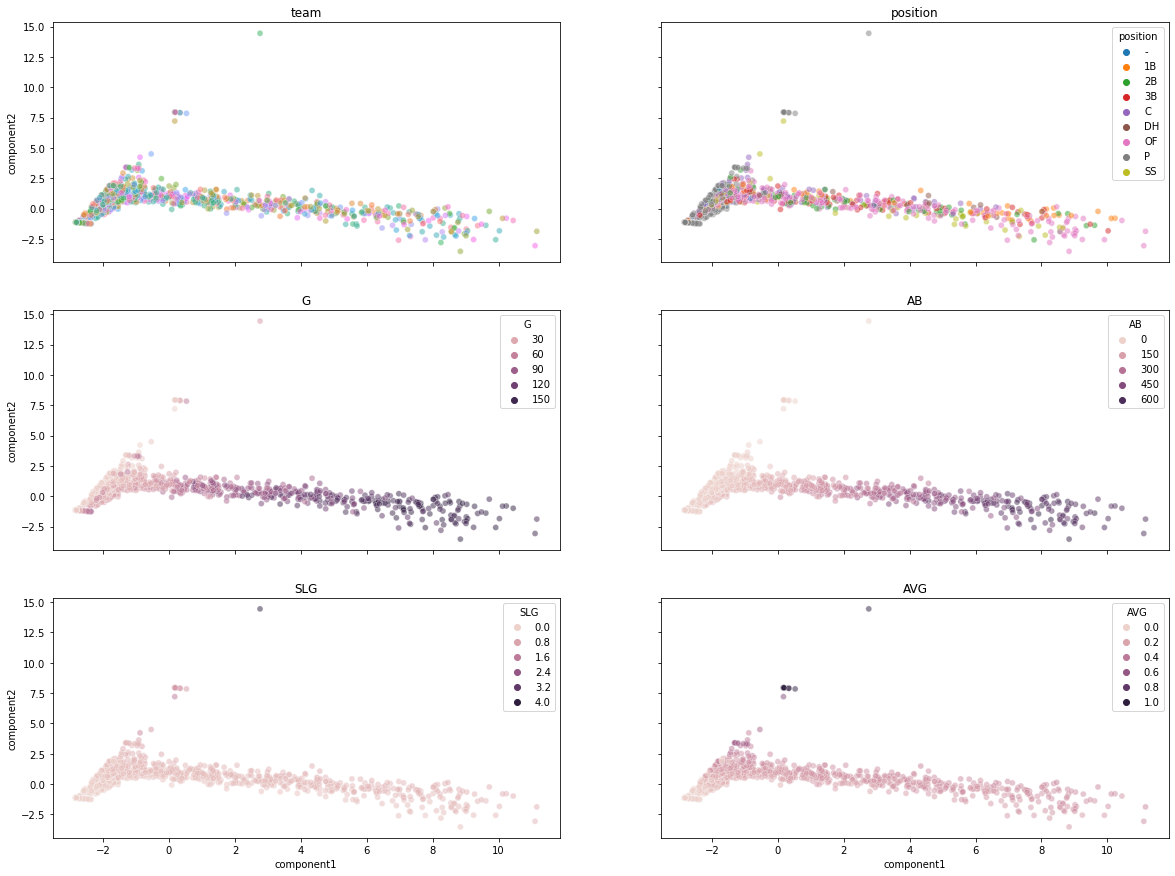

In [27]:
f, axes = plt.subplots(len(cols)//2,2, figsize=(20,15), sharex=True, sharey=True)

for i, (ax, col) in enumerate(zip(axes.flat, cols)):
    sns.scatterplot(data=dfpca, x='component1', y='component2', hue=col, alpha=0.5, ax=ax )
    if i == 0:
        ax.get_legend().remove()
#     else:
#         ax.legend()
    ax.set_title(str(col))



#### Mostrant 3 components

In [28]:
pca3 = PCA(n_components=3, svd_solver='arpack')

mlb_pca3 = pca3.fit_transform(mlb_transf)


print(f'Número de components: {pca3.n_components}')
print(f'Explained Variation Ratio de cada component')
for c in range(pca.n_components_):
    print(f'\tComponent {c}: Ratio: {pca3.explained_variance_ratio_[c]:.5f}\tSingular Values: {pca3.singular_values_[c]:.5f}')
    

Número de components: 3
Explained Variation Ratio de cada component
	Component 0: Ratio: 0.65205	Singular Values: 117.64046
	Component 1: Ratio: 0.10685	Singular Values: 47.62205


In [29]:
dfpca3 = pd.DataFrame(data=mlb_pca3, index=mlb.index,
                     columns=['component'+str(i+1) for i in range(pca3.n_components_)],)


cols = ['team','position','G','AB','SLG','AVG']
dfpca3 = pd.concat([mlb[cols],dfpca3], axis=1)

#### Observem la reducció de dimensions del conjunt de dades i com queda en algun dels paràmetres

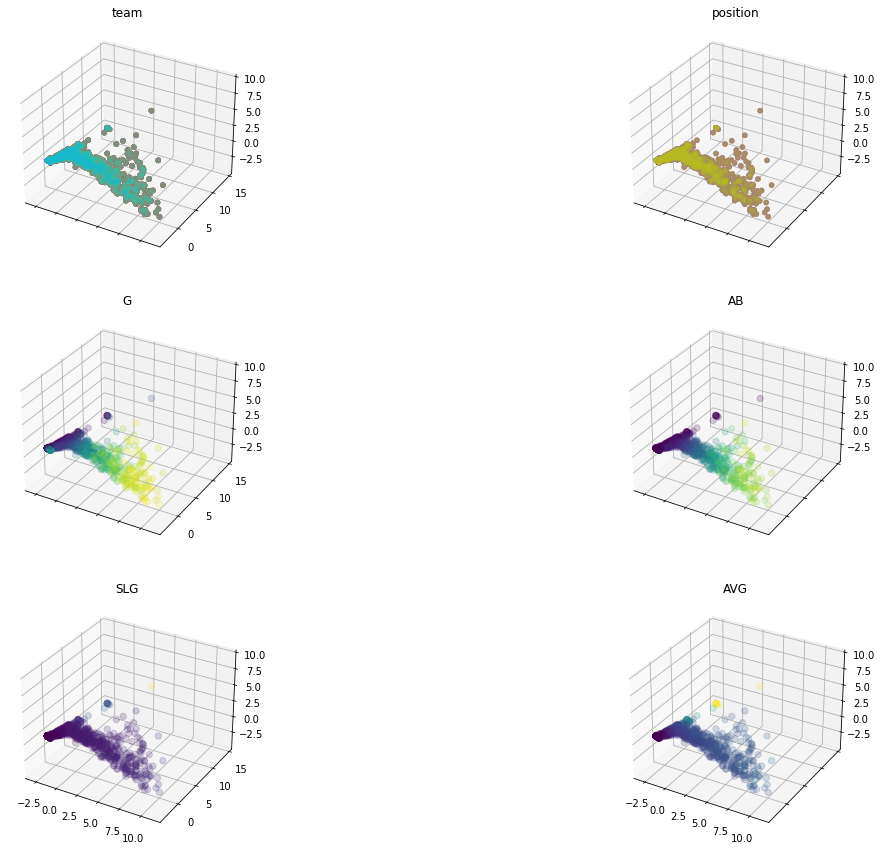

In [30]:
f, axes = plt.subplots(len(cols)//2,2, figsize=(20,15), sharex=True, sharey=True,
                      subplot_kw={'projection': '3d'})

for i, (ax, col) in enumerate(zip(axes.flat, cols)):
    if col in cols_cat:
        for t in mlb[col].unique():
            ax.scatter(dfpca3['component1'], dfpca3['component2'], dfpca3['component3'], alpha=0.2,)
    else:
        colors = mlb[col]
        ax.scatter(dfpca3['component1'], dfpca3['component2'], dfpca3['component3'], alpha=0.2, c=colors, s=40 )
#     if i == 0:
#         ax.get_legend().remove()
#     else:
#         ax.legend()
    ax.set_title(str(col))



In [31]:
pca.explained_variance_ratio_.sum(), pca3.explained_variance_ratio_.sum()

(0.7589067926702275, 0.8289488862043684)

In [32]:
len(cols_num) , ct.named_transformers_.cat.get_feature_names(cols_cat).shape

(16, (39,))

In [33]:
# cols_num.extend(ct.named_transformers_.cat.get_feature_names(cols_cat))

In [34]:
cols_num

['G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'TB',
 'BB',
 'SO',
 'SB',
 'CS',
 'OBP',
 'SLG',
 'AVG']

In [35]:
ct.transformers_[1][1].get_feature_names()

array(['x0_ARI', 'x0_ATL', 'x0_BAL', 'x0_BOS', 'x0_CHC', 'x0_CIN',
       'x0_CLE', 'x0_COL', 'x0_CWS', 'x0_DET', 'x0_FLA', 'x0_HOU',
       'x0_KC', 'x0_LAA', 'x0_LAD', 'x0_MIL', 'x0_MIN', 'x0_NYM',
       'x0_NYY', 'x0_OAK', 'x0_PHI', 'x0_PIT', 'x0_SD', 'x0_SEA', 'x0_SF',
       'x0_STL', 'x0_TB', 'x0_TEX', 'x0_TOR', 'x0_WSH', 'x1_-', 'x1_1B',
       'x1_2B', 'x1_3B', 'x1_C', 'x1_DH', 'x1_OF', 'x1_P', 'x1_SS'],
      dtype=object)

In [36]:
pca.components_.shape

(2, 55)

## Nivell 3
### Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [37]:
ct2 = ColumnTransformer(
             transformers=[('num', RobustScaler(), cols_num),
                          ('cat', OneHotEncoder(handle_unknown='ignore'), cols_cat)])

# ct.fit_transform(mlb)

pipeline2 = Pipeline( steps=[('transformer',ct2)], verbose=True)

In [38]:
mlb_robust = pipeline2.fit_transform(mlb)

[Pipeline] ....... (step 1 of 1) Processing transformer, total=   0.0s


In [39]:
pipeline2.transform(mlb)

array([[ 1.72368421,  2.87053571,  2.67924528, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.65789474,  2.79464286,  4.0754717 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.65789474,  2.76339286,  3.62264151, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.31578947, -0.16517857, -0.11320755, ...,  0.        ,
         1.        ,  0.        ],
       [-0.32894737, -0.16517857, -0.11320755, ...,  0.        ,
         1.        ,  0.        ],
       [-0.35526316, -0.16517857, -0.11320755, ...,  0.        ,
         1.        ,  0.        ]])

#### Apliquem PCA i mirem les dades normalitzades amb RobustScaler

In [40]:
pca = PCA(n_components=2, svd_solver='arpack')

mlb_pca_r = pca.fit_transform(mlb_robust)


print(f'Número de components: {pca.n_components}')
print(f'Explained Variation Ratio de cada component')
for c in range(pca.n_components_):
    print(f'\tComponent {c}: Ratio: {pca.explained_variance_ratio_[c]:.5f}\tSingular Values: {pca.singular_values_[c]:.5f}')
    

Número de components: 2
Explained Variation Ratio de cada component
	Component 0: Ratio: 0.79712	Singular Values: 245.90953
	Component 1: Ratio: 0.11649	Singular Values: 94.00845


In [41]:
dfpca = pd.DataFrame(data=mlb_pca_r, index=mlb.index,
                     columns=['component'+str(i+1) for i in range(pca.n_components_)],)


cols = ['team','position','G','AB','SLG','AVG']
dfpca = pd.concat([mlb[cols],dfpca], axis=1)

#### Observem la reducció de dimensions del conjunt de dades i com queda en algun dels paràmetres

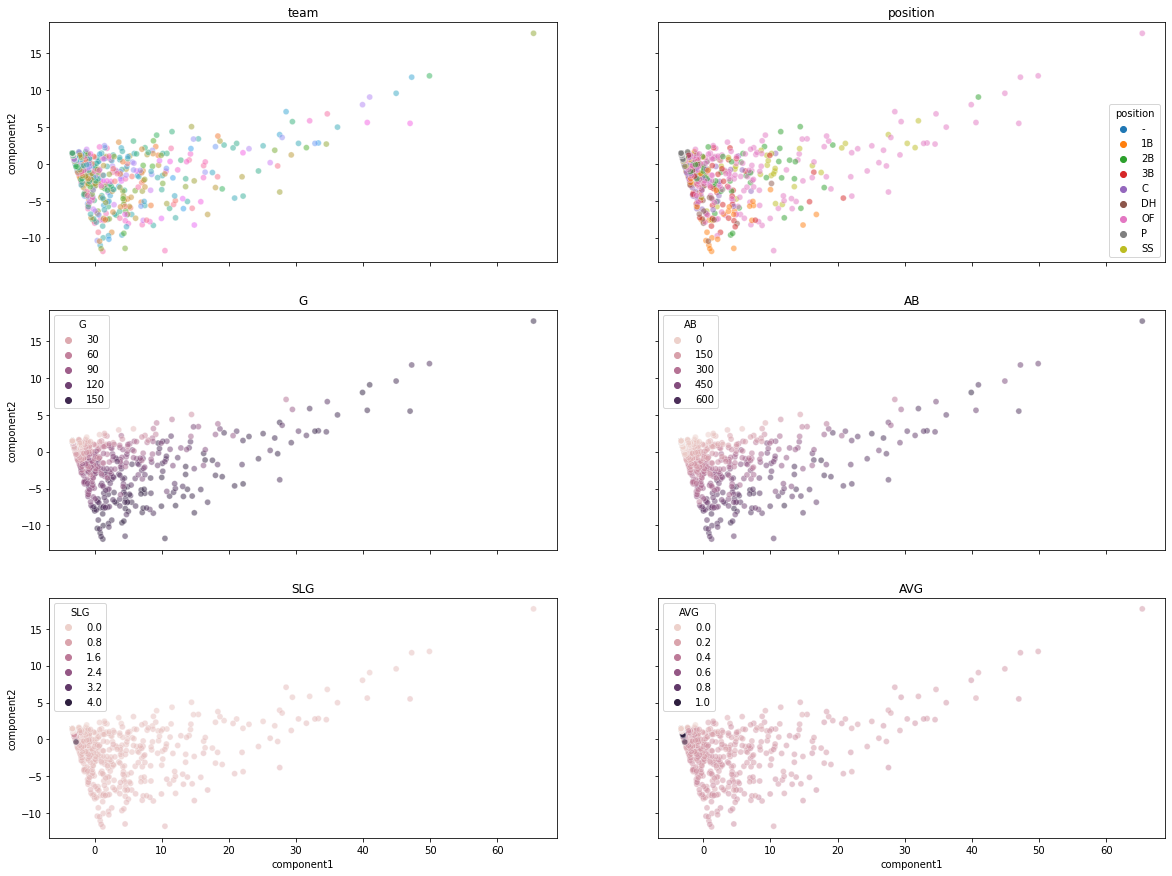

In [42]:
f, axes = plt.subplots(len(cols)//2,2, figsize=(20,15), sharex=True, sharey=True)

for i, (ax, col) in enumerate(zip(axes.flat, cols)):
    sns.scatterplot(data=dfpca, x='component1', y='component2', hue=col, alpha=0.5, ax=ax )
    if i == 0:
        ax.get_legend().remove()
#     else:
#         ax.legend()
    ax.set_title(str(col))

